<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/labs/cs473_lab_week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 473 Lab Week 5

## Introduction:

In this lab, we will carefully explore Bayesian reasoning using something called the "Numbers Game", a thought experiment from Josh Tenenbaum's PhD thesis.  You will implement a version of the numbers game, which will involve priors, likelihoods, posteriors, and posterior predictives.

See Ch 4.6 for the necessary Bayesian background.

[The numbers game is described in detail in this PDF](https://wingated.github.io/cs473/pdfs/numbers_game.pdf). NOTE that you only need up to section 2.5 (pg. 7), not the whole thing!

For this lab, your notebook should perform the following functions:

* Prompt the user for a set of numbers. (What happens if they only enter one number?)
* Display the prior, likelihood, and posterior for each concept
* Print the most likely concept
* Print the posterior predictive distribution over numbers

When you display your prior, likelihood, and posterior, your figure should look something like the ones in the book; my version is shown here:

![figure 1](https://raw.githubusercontent.com/wingated/cs473/main/labs/images/lab_week_5_image1.png)

Similarly, when you display the posterior predictive, your figure should look something like this:

![figure 2](https://raw.githubusercontent.com/wingated/cs473/main/labs/images/lab_week_5_image2.png)

---
## Grading standards   

Your notebook will be graded on the following:

* 10% Correctly formed & normalized prior
* 20% Correctly formed likelihood
* 30% Correctly formed & normalized posterior
* 30% Correctly formed & normalized posterior predictive
* 10% tidy and legible figures, including labeled axes

Remember: correct normalization may mean different things for different distributions!

---
## Description

Following the Bayesian Concept Learning example in the PDF, we're interested in reasoning about the origin of a set of numbers. We'll do this by placing a prior over a set of possible concepts (or “candidate origins”), and then use Bayes' law to construct a posterior distribution over concepts given some data.

For this lab, we will only consider numbers between 0 and 100, inclusive.

Your notebook should construct a set of possible number-game concepts (such as “even” or “odd”). These can be any set of concepts you want, but should include at least all of the concepts in the book (see, for example, Fig. 3.2). You must assign a prior probability to each concept.

To make grading easier on our incredible TA, your notebook should construct a set of possible number-game concepts that are the same as the concepts in in the image at the beginning of this notebook. You must assign a prior probability to each concept; to make grading easier, your prior should be:

```python
prior = numpy.ones(len(concepts))
prior[0] = 5
prior[1] = 5
prior[30] = .01
prior[31] = .01
prior = prior / numpy.sum(prior)
```

This prior distribution is $p(h)$.

You must then prompt the user for some data. This will just be a sequence of numbers, like 16, 2,4,6 or 4,9,25. This is *data*. You must then compute the likelihood of the *data*, given the hypothesis: $p(data|h)$.

**Important:** you can assume that each number in the data was sampled **independently**, and that each number was sampled **uniformly** from the set of all possible numbers *in that concept*.

*Hint: what does that imply about the probability of sampling a given number from a concept with lots of possibilities, such as the all concept, vs. a concept with few possibilities, such as multiples of 10?*

Prepare a figure, as described in the Deliverable that illustrates your prior, the likelihood of the data for each concept, the posterior. Note: distributions should be properly normalized.

You must also prepare a figure showing the posterior predictive distribution. This distribution describes the probability that a number *x* is in the target concept (which we'll call *C*), given the data. (Note that we're drawing a subtle distinction between the true concept and a hypothesis). The book is somewhat unclear on this, but to do this, we marginalize out the specific hypothesis:

![equations](https://raw.githubusercontent.com/wingated/cs473/main/labs/images/lab_week_5_image3.png)

We've already computed the posterior $p(h|data)$, so we're only left with the term $p(\tilde{x} \in C|h)$. For this, just use an **indicator** function that returns 1 if $\tilde{x}$ is in **h**, and 0 otherwise.


*Hint: just like any other distribution, the posterior predictive is normalized - but it is not normalized as a function of $\tilde{x}$. So what is it normalized over?*


---
## Hints

You may find the following functions useful:

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

concepts = {}
all_numbers = set(range(101))

In [24]:
def arithmetic_concepts():
  concepts['even'] = set(filter(lambda i: i % 2 == 0, all_numbers))
  concepts['odd'] = set(filter(lambda i: i % 2 != 0, all_numbers))
  concepts['low'] = set(filter(lambda i: i <= 50, all_numbers))
  concepts['high'] = set(filter(lambda i: i > 50, all_numbers))
  return concepts


In [25]:
def exponential_concepts():
  concepts['squares'] = {i*i for i in range(11)}
  concepts['cubes'] = {i*i*i for i in range(5)}
  concepts['powers of 2'] = {2**i for i in range(7)}
  concepts['powers of 3'] = {3**i for i in range(5)}
  return concepts

In [26]:
def primes_concepts():
  primes_list = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
  concepts['primes'] = set(primes_list)
  return concepts

In [27]:
def digits_concepts():
  concepts['single digit'] = set(filter(lambda i: i < 10, all_numbers))
  concepts['two digit'] = set(filter(lambda i: 10 <= i < 100, all_numbers))
  concepts['all'] = all_numbers
  concepts['none'] = set()
  return concepts

In [28]:
def multiples_ending_digits():
    for i in range(3, 11):
        concepts[f'mult of {i}'] = set(filter(lambda j, divisor=i: j % divisor == 0, all_numbers))
    for i in range(10):
        concepts[f'ends in {i}'] = set(filter(lambda j, digit=i: j % 10 == digit, all_numbers))
    return concepts

In [29]:

def generate_concepts():
    """
    Generates the hypothesis space of all number concepts using filter().
    Each concept is a set of numbers between 0 and 100.
    """
    arithmetic_concepts()
    primes_concepts()
    exponential_concepts()
    digits_concepts()
    multiples_ending_digits()

    concept_names = sorted(list(concepts.keys()))
    concept_sets = [concepts[name] for name in concept_names]

    return concept_names, concept_sets




In [30]:
seaborn.set_style("whitegrid")
concept_names, concept_sets = generate_concepts()
num_concepts = len(concept_names)

In [31]:
#normalization p(h)
prior = np.ones(num_concepts)
prior[concept_names.index('even')] = 5
prior[concept_names.index('odd')] = 5
prior[concept_names.index('all')] = 0.01
prior[concept_names.index('none')] = 0.01
prior = prior / np.sum(prior)

In [55]:
while True:
        try:
            user_input = input('Please enter a set of numbers: ')
            # Use map to convert strings to integers, then create a set
            data = set(map(int, user_input.replace(' ', '').split(',')))

            if not data:
                print("Please enter at least one number.")
                continue

            break
        except (ValueError, IndexError):
            print("Invalid input. Please enter comma-separated integers (e.g., 16, 8, 64).")

Please enter a set of numbers: 23, 8, 91, 45, 67, 12, 78, 33, 5, 99, 28, 54, 82, 19, 40, 71, 6, 88, 50, 97


In [56]:
# Likelihood p(D|h)
likelihood = np.zeros(num_concepts)
for i, h_set in enumerate(concept_sets):
    if all(x in h_set for x in data):
        size_h = len(h_set)
        if size_h > 0:
            likelihood[i] = (1.0 / size_h) ** len(data)

In [57]:
#Posterior p(h|D)
unnormalized_posterior = prior * likelihood
evidence = np.sum(unnormalized_posterior)
posterior = unnormalized_posterior / evidence if evidence > 0 else np.zeros(num_concepts)

In [58]:
#Posterior Predictive p(x_tilde|D)
post_pred = np.zeros(101) # For numbers 0-100
for x_tilde in range(101):
    # Sum the posterior probabilities of all concepts that contain x_tilde
    post_pred[x_tilde] = sum(posterior[i] for i, h_set in enumerate(concept_sets) if x_tilde in h_set)

In [59]:
#--- Display Results ---
print("\n--- Bayesian Inference Results ---")
if evidence > 0:
    best_h_idx = np.argmax(posterior)
    print(f"The most likely concept is: '{concept_names[best_h_idx]}'")
else:
    print("The given numbers do not fit any of the defined concepts.")


--- Bayesian Inference Results ---
The most likely concept is: 'all'


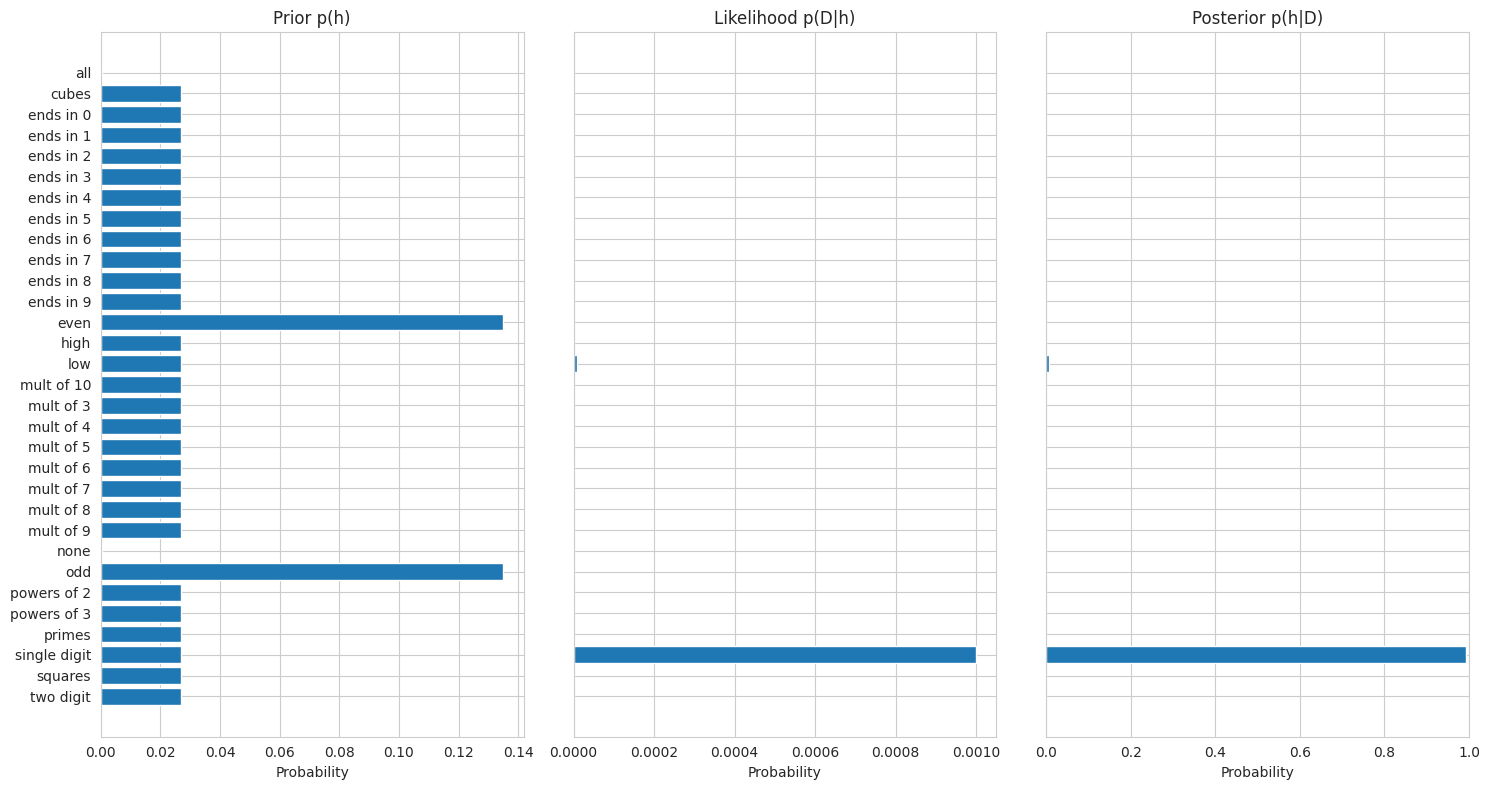

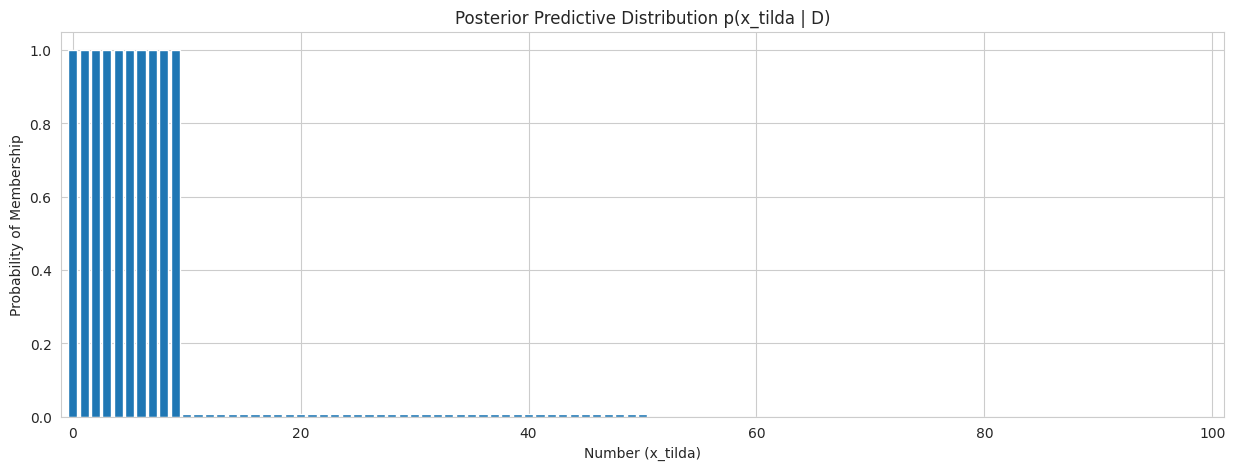

In [48]:
#plots
# --- Plotting Distributions (Prior, Likelihood, Posterior) ---
plt.figure(42, figsize=(15, 8))
plt.clf() # Clear the figure before drawing
y_pos = np.arange(num_concepts)

# Subplot 1: Prior
axis1 = plt.subplot(1, 3, 1)
axis1.barh(y_pos, prior, align='center')
axis1.set_yticks(y_pos)
axis1.set_yticklabels(concept_names)
axis1.invert_yaxis()
axis1.set_title('Prior p(h)')
axis1.set_xlabel('Probability')
axis1.set_xlim(left=0)

# Subplot 2: Likelihood
axis2 = plt.subplot(1, 3, 2, sharey=axis1)
axis2.barh(y_pos, likelihood, align='center')
axis2.set_title('Likelihood p(D|h)')
axis2.set_xlabel('Probability')
axis2.set_xlim(left=0)
plt.setp(axis2.get_yticklabels(), visible=False)

# Subplot 3: Posterior
axis3 = plt.subplot(1, 3, 3, sharey=axis1)
axis3.barh(y_pos, posterior, align='center')
axis3.set_title('Posterior p(h|D)')
axis3.set_xlabel('Probability')
axis3.set_xlim(left=0, right=1.0)
plt.setp(axis3.get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

# --- Plotting Posterior Predictive ---
plt.figure(43, figsize=(15, 5))
plt.clf()
plt.bar(range(101), post_pred)
plt.title('Posterior Predictive Distribution p(x_tilda | D)')
plt.xlabel('Number (x_tilda)')
plt.ylabel('Probability of Membership')
plt.xlim(-1, 101)
plt.show()
